In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Domain – Automotive
focus – Incentivize drivers

### Business challenge/requirement:
Lithionpower is the largest provider of electric vehicle(e-vehicle) batteries. It provides battery on a rental model to e-vehicle drivers. Drivers rent battery typically for a day and then replace it with a charged battery from the company.
Lithionpower has a variable pricing model based on driver's driving history. As the life of a battery depends on factors such as overspeeding, distance driven per day etc.
You as a ML expert have to create a cluster model where drivers can be grouped together based on the driving data.

### Key issues
Drivers will be incentivized based on the cluster, so grouping has to be accurate

In [2]:
dat = pd.read_csv("driver-data.csv")

In [3]:
dat.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [4]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


<AxesSubplot:xlabel='mean_dist_day', ylabel='mean_over_speed_perc'>

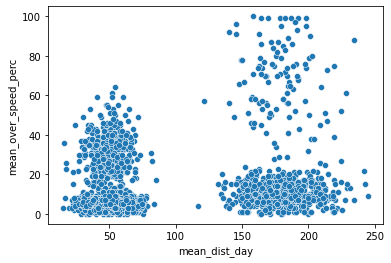

In [15]:
sns.scatterplot(x= dat["mean_dist_day"], y=dat["mean_over_speed_perc"])

In [8]:
dat = dat.drop("id", axis=1)

In [6]:
from sklearn.cluster import KMeans

In [65]:
kmeans = KMeans(n_clusters=4)

In [66]:
kmeans.fit(dat)

KMeans(n_clusters=4)

In [67]:
kmeans.cluster_centers_

array([[ 50.40482436,  32.36533958],
       [180.34311782,  10.52011494],
       [177.83509615,  70.28846154],
       [ 49.99263253,   5.20447169]])

In [68]:
cluster_centers_df = pd.DataFrame(kmeans.cluster_centers_)

In [69]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1])

<AxesSubplot:xlabel='mean_dist_day', ylabel='mean_over_speed_perc'>

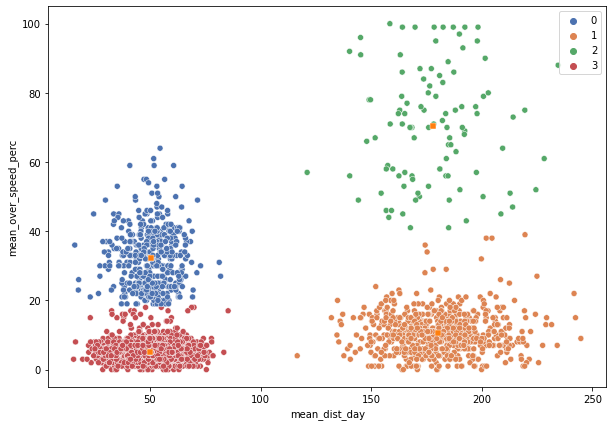

In [90]:
plt.figure(figsize=(10,7))
sns.scatterplot(data = dat, x= "mean_dist_day", y="mean_over_speed_perc", hue=kmeans.labels_, palette='deep')
sns.scatterplot(x= cluster_centers_df[0], y=cluster_centers_df[1], marker = 's')

### Driver groupped to 4 category. 
### - Low distance, no over speed
### - Low distance, over speeded
### - high distance, no over speed
### - high distance, over speeded
